# Pandas `crosstab`

This is a notebook for the medium article [Summarizing data with Pandas crosstab](https://bindichen.medium.com/summarizing-data-with-pandas-crosstab-efc8b9abecf)



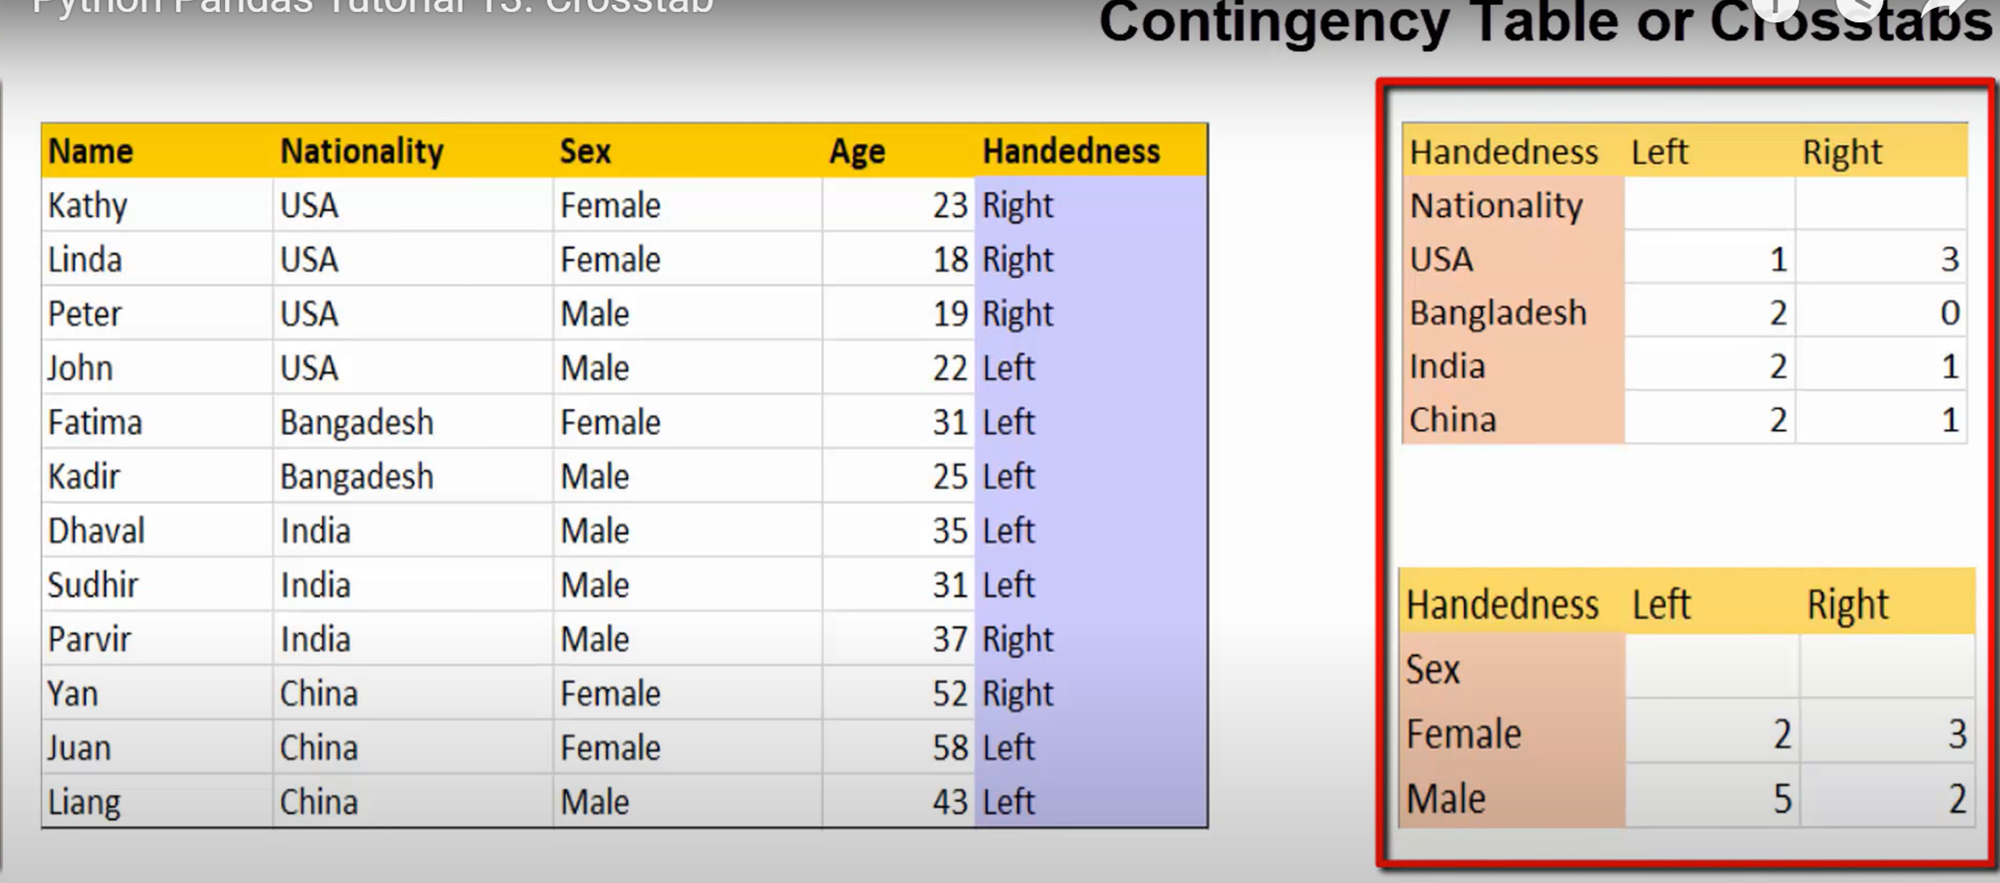

In [29]:
import pandas as pd
df = pd.read_excel("survey.xls")
df
#df.style.set_table_styles([{'selector':'','props':[('border','4px solid #7a7')]}])


Name Nationality     Sex  Age Handedness
0    Kathy         USA  Female   23      Right
1    Linda         USA  Female   18      Right
2    Peter         USA    Male   19      Right
3     John         USA    Male   22       Left
4   Fatima   Bangadesh  Female   31       Left
5    Kadir   Bangadesh    Male   25       Left
6   Dhaval       India    Male   35       Left
7   Sudhir       India    Male   31       Left
8   Parvir       India    Male   37      Right
9      Yan       China  Female   52      Right
10    Juan       China  Female   58       Left
11   Liang       China    Male   43       Left

In [30]:
pd.crosstab(df.Nationality,df.Handedness)

Handedness   Left  Right
Nationality             
Bangadesh       2      0
China           2      1
India           2      1
USA             1      3

In [31]:
pd.crosstab(df.Sex,df.Handedness)


Handedness  Left  Right
Sex                    
Female         2      3
Male           5      2

In [32]:
pd.crosstab(df.Sex,df.Handedness, margins=True)


Handedness  Left  Right  All
Sex                         
Female         2      3    5
Male           5      2    7
All            7      5   12

In [33]:
pd.crosstab(df.Sex, [df.Handedness,df.Nationality], margins=True)


Handedness       Left                 Right           All
Nationality Bangadesh China India USA China India USA    
Sex                                                      
Female              1     1     0   0     1     0   2   5
Male                1     1     2   1     0     1   1   7
All                 2     2     2   1     1     1   3  12

In [34]:
pd.crosstab([df.Nationality, df.Sex], [df.Handedness], margins=True)


Handedness          Left  Right  All
Nationality Sex                     
Bangadesh   Female     1      0    1
            Male       1      0    1
China       Female     1      1    2
            Male       1      0    1
India       Male       2      1    3
USA         Female     0      2    2
            Male       1      1    2
All                    7      5   12

In [35]:
pd.crosstab(df.Sex, df.Handedness, normalize='index')


Handedness      Left     Right
Sex                           
Female      0.400000  0.600000
Male        0.714286  0.285714

In [36]:
import numpy as np
pd.crosstab(df.Sex, df.Handedness, values=df.Age, aggfunc=np.average)

Handedness  Left  Right
Sex                    
Female      44.5   31.0
Male        31.2   28.0

## Data

1. Simplest crosstab table

2. Displaying multiple rows and columns

3. Showing total with margins

4. Getting the percentage of occurs with normalize

5. Specifying values and performing aggregation

6. Handling missing values

7. Visualization with Seaborn heatmap

In [37]:
import pandas as pd

In [39]:
def load_data():
    return pd.read_csv('coffee_sales.csv', parse_dates=['order_date'])

In [42]:
df = load_data()
df = pd.read_csv('coffee_sales.csv', parse_dates=['order_date'])
df.head()

order_date     market   region product_category            product  cost  \
0 2010-01-01  Wholesale  Central           Coffee           Amaretto    89   
1 2010-01-01  Wholesale  Central           Coffee          Columbian    83   
2 2010-01-01  Wholesale  Central           Coffee  Decaf Irish Cream    95   
3 2010-01-01  Wholesale  Central              Tea          Green Tea    44   
4 2010-01-01  Wholesale  Central         Espresso        Caffe Mocha    54   

   inventory  net_profit  sales  
0        777          94    219  
1        623          68    190  
2        821         101    234  
3        623          30    100  
4        456          54    134

## 1. Creating a simple cross tabulation

When you create a crosstab table, you’ll need to specify what you want on the rows and how to split the columns. By default, it is calculating the number of observations in each combination. In our example, let’s use the region as our row index and split the columns by product_category.

In [43]:
pd.crosstab(df['region'], df['product_category'])

product_category  Coffee  Espresso  Herbal tea  Tea
region                                             
Central              384       288         336  336
East                 168       240         216  264
South                192       288         192    0
West                 312       360         312  360

In some cases, you would prefer a custom label for display purposes. To do that, we can include the specific rownames and colnames:

In [44]:
pd.crosstab(
    df['region'], 
    df['product_category'], 
    rownames=['US Region'], 
    colnames=['Product Category']
)

Product Category  Coffee  Espresso  Herbal tea  Tea
US Region                                          
Central              384       288         336  336
East                 168       240         216  264
South                192       288         192    0
West                 312       360         312  360

## 2. Display multiple rows and columns

One of the most useful features of crosstab is that you can pass in multiple indexes and columns, and it does all the grouping for us. For example, if we want to see how the data is distributed by market, we can include the market column by including it in a list:

In [45]:
# multiple columns
pd.crosstab(
    df['region'], 
    [df['product_category'], df['market']]
)

product_category Coffee           Espresso           Herbal tea            \
market           Retail Wholesale   Retail Wholesale     Retail Wholesale   
region                                                                      
Central             192       192      144       144        144       192   
East                 72        96       96       144         72       144   
South               144        48      216        72        144        48   
West                240        72      288        72        240        72   

product_category    Tea            
market           Retail Wholesale  
region                             
Central             168       168  
East                 96       168  
South                 0         0  
West                288        72

Similarly, we can specify a custom label for display purposes. Both rownames and colnames accept a list of labels with each corresponding to the row and column.

In [46]:
# multiple columns with custom labels
pd.crosstab(
    df['region'], 
    [df['product_category'], df['market']],
    rownames=['US Region'], 
    colnames=['Product Category', 'Market']
)

Product Category Coffee           Espresso           Herbal tea            \
Market           Retail Wholesale   Retail Wholesale     Retail Wholesale   
US Region                                                                   
Central             192       192      144       144        144       192   
East                 72        96       96       144         72       144   
South               144        48      216        72        144        48   
West                240        72      288        72        240        72   

Product Category    Tea            
Market           Retail Wholesale  
US Region                          
Central             168       168  
East                 96       168  
South                 0         0  
West                288        72

In [47]:
# multiple rows
pd.crosstab(
    [df['region'], df['market']], 
    df['product_category']
)

product_category   Coffee  Espresso  Herbal tea  Tea
region  market                                      
Central Retail        192       144         144  168
        Wholesale     192       144         192  168
East    Retail         72        96          72   96
        Wholesale      96       144         144  168
South   Retail        144       216         144    0
        Wholesale      48        72          48    0
West    Retail        240       288         240  288
        Wholesale      72        72          72   72

## 3. Adding rows/columns subtotals

In [48]:
pd.crosstab(df['region'], df['product_category'], margins = True)

product_category  Coffee  Espresso  Herbal tea  Tea   All
region                                                   
Central              384       288         336  336  1344
East                 168       240         216  264   888
South                192       288         192    0   672
West                 312       360         312  360  1344
All                 1056      1176        1056  960  4248

In [49]:
# custom name
pd.crosstab(
    df['region'], df['product_category'], 
    margins = True, 
    margins_name = 'Subtotals'
)

product_category  Coffee  Espresso  Herbal tea  Tea  Subtotals
region                                                        
Central              384       288         336  336       1344
East                 168       240         216  264        888
South                192       288         192    0        672
West                 312       360         312  360       1344
Subtotals           1056      1176        1056  960       4248

## 4. Getting the percentage of occurs with `normalize`

In [50]:
pd.crosstab(df['region'], df['product_category'], normalize = True)

product_category    Coffee  Espresso  Herbal tea       Tea
region                                                    
Central           0.090395  0.067797    0.079096  0.079096
East              0.039548  0.056497    0.050847  0.062147
South             0.045198  0.067797    0.045198  0.000000
West              0.073446  0.084746    0.073446  0.084746

In [24]:
# formatted with a percent sign (%)
pd.crosstab(
    df['region'], 
    df['product_category'], 
    normalize = True
).style.format('{:.2%}')

In [53]:
# margins = True, and formatted with a percent sign (%)
pd.crosstab(
    df['region'], 
    df['product_category'], 
    margins = True, 
    normalize = True
).style.format('{:.1%}')

#### The normalize argument accepts the other two values 'index' and 'columns' :

1. If 'index' is given, it will normalize over each row.

2. If 'columns' is given, it will normalize over each column.

In [54]:
# margins = index, and formatted with a percent sign (%)
pd.crosstab(
    df['region'], 
    df['product_category'], 
    margins = True, 
    normalize = 'index'
).style.format('{:.2%}')

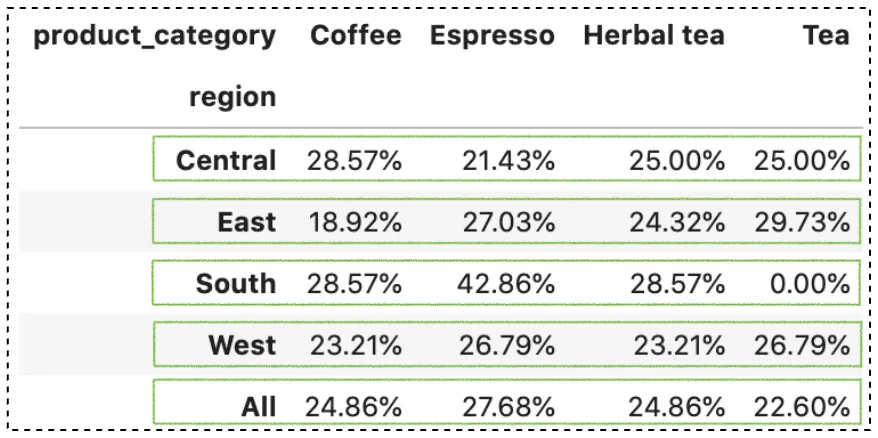

In [55]:
# margins = columns, and formatted with a percent sign (%)
pd.crosstab(
    df['region'], 
    df['product_category'], 
    margins = True, 
    normalize = 'columns'
).style.format('{:.2%}')

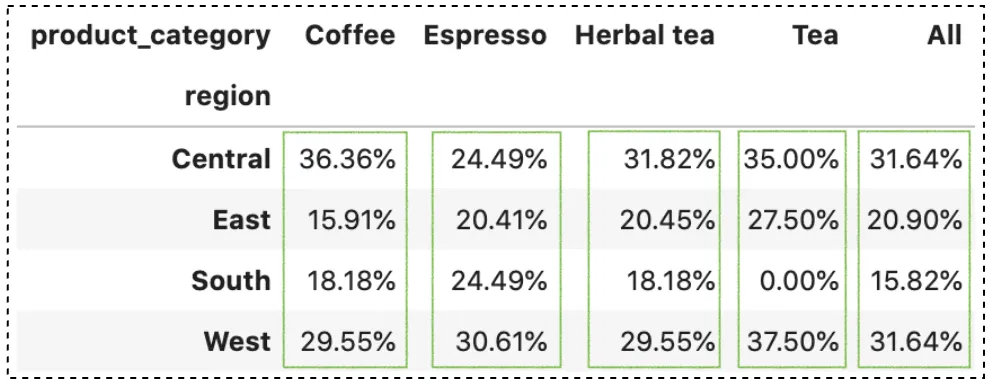

## 5. Performing aggregation

By default, crosstab performs the count aggregation function on all numerical columns and returns the result. To explicitly specify the columns we care about and perform aggregation, use the values and aggfunc arguments.

In [56]:
pd.crosstab(
    df['region'], 
    df['product_category'], 
    values = df['cost'],
    aggfunc = 'mean'
)

product_category      Coffee   Espresso  Herbal tea         Tea
region                                                         
Central            74.390625  89.666667   87.065476   87.690476
East              110.976190  95.600000  101.240741   46.962121
South              78.916667  62.305556   56.270833         NaN
West               90.814103  84.133333   98.987179  100.844444

In [58]:
# To round the result, we can call round():
pd.crosstab(
    df['region'], 
    df['product_category'], 
    values = df['cost'],
    aggfunc = 'mean'
).round(3)

product_category   Coffee  Espresso  Herbal tea      Tea
region                                                  
Central            74.391    89.667      87.065   87.690
East              110.976    95.600     101.241   46.962
South              78.917    62.306      56.271      NaN
West               90.814    84.133      98.987  100.844

## 6. Handling missing values
You probably notice a NaN value from the previous output. We have got that because there aren't any Tea sales in the South.

Unlike privot_table has a built-in fill_value argument to replace any missing value, crosstab doesn’t support it. We have to use other methods to handle missing values, for example:

In [60]:
pd.crosstab(
    df['region'], 
    df['product_category'], 
    values = df['cost'],
    aggfunc = 'mean',
).fillna(0)

product_category      Coffee   Espresso  Herbal tea         Tea
region                                                         
Central            74.390625  89.666667   87.065476   87.690476
East              110.976190  95.600000  101.240741   46.962121
South              78.916667  62.305556   56.270833    0.000000
West               90.814103  84.133333   98.987179  100.844444

## 7. Visualization

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

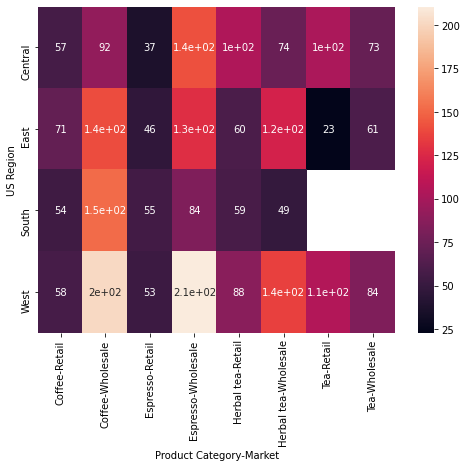

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    pd.crosstab(
        df['region'], 
        [df['product_category'], df['market']],
        rownames=['US Region'], 
        colnames=['Product Category', 'Market'],
        values = df['cost'],
        aggfunc = 'mean'
    ), 
    annot = True
)
plt.show()


### Thanks for reading

This is a notebook for the medium article [Summarizing data with Pandas crosstab](https://bindichen.medium.com/summarizing-data-with-pandas-crosstab-efc8b9abecf)

Please check out article for instructions

**License**: [BSD 2-Clause](https://opensource.org/licenses/BSD-2-Clause)